In [92]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob

In [93]:
dir="//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2025_winter/"

#ddir="C:/Users/Expedition/Desktop/expedition2024_summer/"

In [94]:
data = ert.load(dir + '15Mar/k38_diag1_ws_march.tx0')
data_topo = pd.read_csv(dir + '15Mar/k38_diag1_topo.txt', sep='\s+', header=None)


30/07/25 - 15:09:33 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
30/07/25 - 15:09:33 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
30/07/25 - 15:09:33 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
30/07/25 - 15:09:33 - pyGIMLi - INFO - No electrode positions found!
30/07/25 - 15:09:33 - pyGIMLi - INFO - imported:  Data: Electrodes: 48 data: 405


In [18]:
data_topo

,0,1
0,0.000000,17.515
1,1.925069,17.914
2,3.850322,18.428
3,5.739650,19.078
4,7.631820,19.395
5,9.678087,19.687
6,11.625502,20.004
7,13.617639,20.260
8,15.589989,20.289
9,17.532802,20.420


In [95]:
data.save("//smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/raw_data/kamik_f38_diag1_02.txt", "a b m n err iperr rhoa")

1

In [57]:



for i in range(data.sensorCount()):
    y_new = data_topo[1][i]  
    x_new = data_topo[0][i]  
    data.setSensorPosition(i, [x_new, y_new])

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1c30e297dd0>)

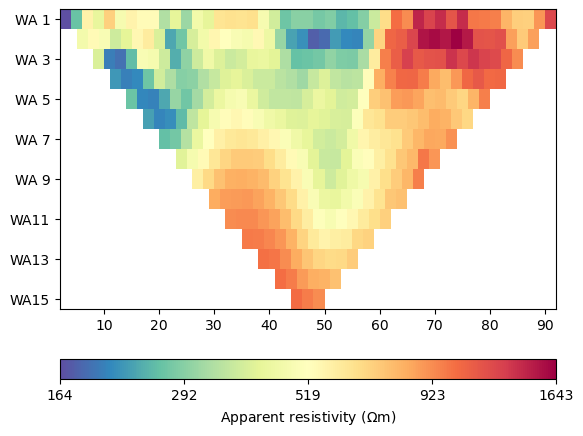

In [58]:
ert.showData(data)

In [10]:
data

Data: Sensors: 48 data: 405, nonzero entries: ['a', 'b', 'err', 'i', 'ip', 'iperr', 'm', 'n', 'rhoa', 'u', 'valid']

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1c2fef48450>)

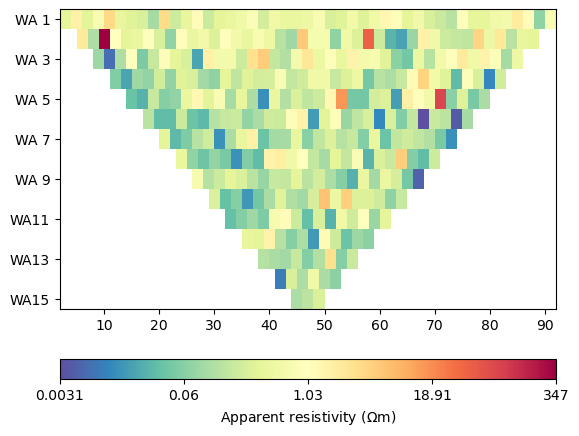

In [46]:
ert.showData(data,data['iperr'])

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1c30c1bbb90>)

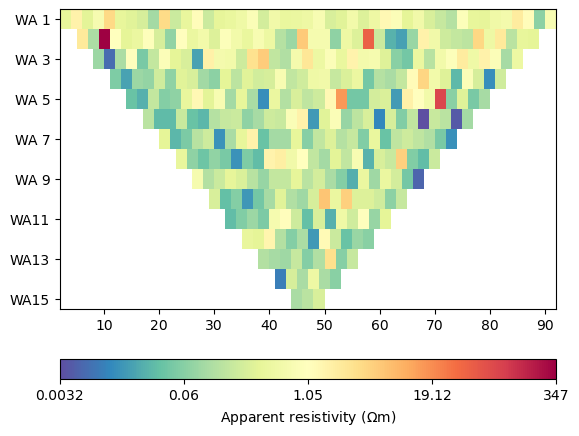

In [60]:
ert.showData(data,data['err'])

In [59]:
data['err'] = data['iperr'] + data['err']

In [5]:
data.remove(data['rhoa']<=0.1)

In [61]:
data["k"] = ert.createGeometricFactors(data, numerical=True)

30/07/25 - 11:03:21 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
30/07/25 - 11:03:31 - pyGIMLi - INFO - Save RVector binary
30/07/25 - 11:03:31 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\4877901531756272101


In [37]:
data.remove(data['iperr']>3)

30/07/25 - 14:41:25 - pyGIMLi - INFO - Found 2 regions.
30/07/25 - 14:41:25 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
30/07/25 - 14:41:25 - pyGIMLi - INFO - Found 2 regions.
30/07/25 - 14:41:25 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
30/07/25 - 14:41:25 - pyGIMLi - INFO - Creating forward mesh from region infos.
30/07/25 - 14:41:25 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
30/07/25 - 14:41:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4520 Cells: 8772 Boundaries: 6712
30/07/25 - 14:41:26 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 14:41:26 - pyGIMLi - INFO - Created startmodel from forward operator:1641, min/max=567.664000/567.664000
30/07/25 - 14:41:26 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30CF0BE70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.71
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    7.74 (dPhi = 95.79%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    6.26 (dPhi = 17.94%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    3.80 (dPhi = 34.85%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    0.65 (dPhi = 60.76%) lam

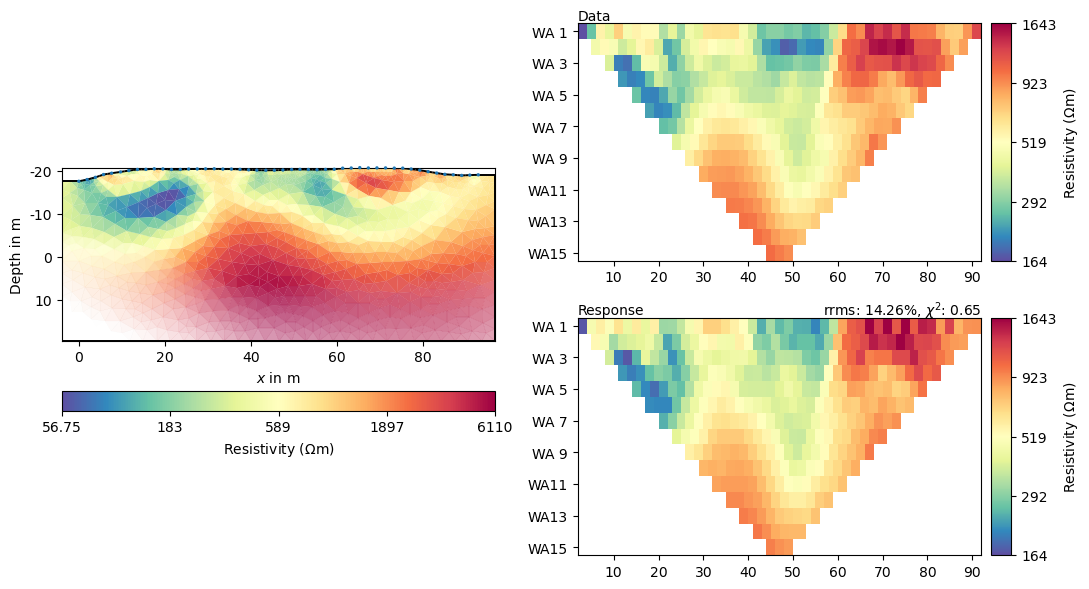

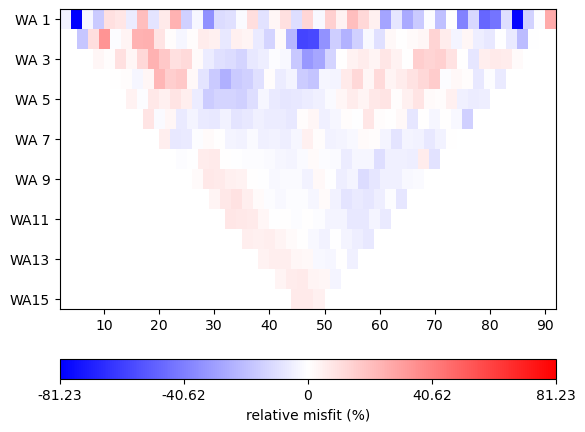

In [85]:
mgr = ert.ERTManager(data)
mgr.invert(data, zWeight=0.5, verbose=True, lam=20, paraMaxCellSize=5)
mgr.showResultAndFit()
mgr.showMisfit()



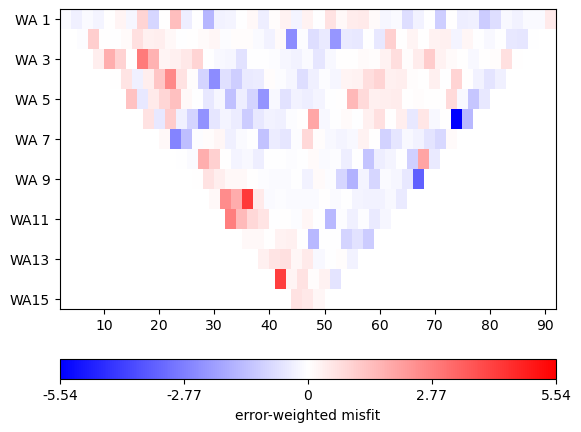

In [88]:
mgr.showMisfit(errorWeighted=True)

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x1c30cdcbd10>)

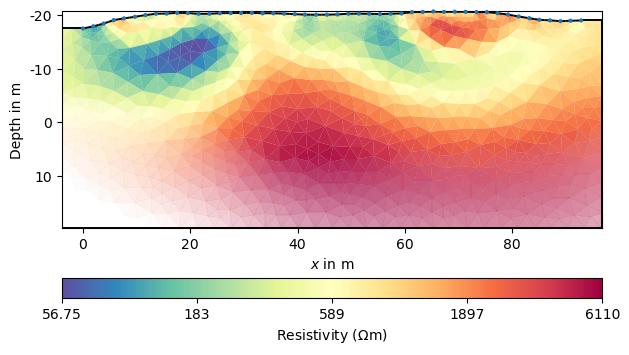

In [89]:
mgr.showResult()

30/07/25 - 12:10:44 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:10:44 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:10:44 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   13.86 (dPhi = 90.12%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

30/07/25 - 12:12:10 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:12:10 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:12:10 - pyGIMLi - INFO - Starting inversion.


chi² =   12.40 (dPhi = 7.24%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   11.39 (dPhi = 1.56%) lam: 1000.0
################################################################################
#                Abort criterion reached: dPhi = 1.56 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   13.07 (dPhi =

30/07/25 - 12:13:32 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:13:32 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:13:32 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   12.33 (dPhi = 91.19%) lam: 727.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   10.63 (dPhi = 9.76%) lam: 727.9
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    9.51 (dPhi = 2.36%) lam: 727.9
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    9.51 (dPhi = -0.00%) la

30/07/25 - 12:15:37 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:15:37 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:15:37 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   11.54 (dPhi = 91.66%) lam: 621.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    9.82 (dPhi = 11.29%) lam: 621.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    8.70 (dPhi = 2.75%) lam: 621.0
--------------------------------------------------------------------------------
inv.iter 4 ... 

30/07/25 - 12:17:52 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:17:52 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:17:52 - pyGIMLi - INFO - Starting inversion.


chi² =    8.70 (dPhi = -0.00%) lam: 621.0
################################################################################
#                Abort criterion reached: dPhi = -0.0 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   10.91 (dPhi = 92.13%) lam: 529.8
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    9.09 (dPhi =

30/07/25 - 12:19:54 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:19:54 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:19:54 - pyGIMLi - INFO - Starting inversion.


chi² =    7.94 (dPhi = -0.00%) lam: 529.8
################################################################################
#                Abort criterion reached: dPhi = -0.0 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   10.30 (dPhi = 92.56%) lam: 452.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    8.42 (dPhi =

30/07/25 - 12:21:27 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:21:27 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:21:27 - pyGIMLi - INFO - Starting inversion.


chi² =    7.23 (dPhi = -0.01%) lam: 452.0
################################################################################
#                Abort criterion reached: dPhi = -0.01 (< 2.0%)                #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    9.73 (dPhi = 92.98%) lam: 385.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    7.81 (dPhi =

30/07/25 - 12:22:44 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:22:44 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:22:44 - pyGIMLi - INFO - Starting inversion.


chi² =    6.57 (dPhi = -0.01%) lam: 385.7
################################################################################
#                Abort criterion reached: dPhi = -0.01 (< 2.0%)                #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    9.18 (dPhi = 93.38%) lam: 329.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    7.24 (dPhi =

30/07/25 - 12:24:51 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:24:51 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:24:51 - pyGIMLi - INFO - Starting inversion.


chi² =    5.96 (dPhi = -0.01%) lam: 329.0
################################################################################
#                Abort criterion reached: dPhi = -0.01 (< 2.0%)                #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    8.93 (dPhi = 93.35%) lam: 280.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    6.63 (dPhi =

30/07/25 - 12:28:04 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:28:04 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000


chi² =    5.33 (dPhi = 0.22%) lam: 280.7
################################################################################
#                Abort criterion reached: dPhi = 0.22 (< 2.0%)                 #
################################################################################


30/07/25 - 12:28:04 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    8.38 (dPhi = 93.75%) lam: 239.5
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    6.16 (dPhi = 22.50%) lam: 239.5
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    4.90 (dPhi = 7.81%) lam: 239.5
--------------------------------------------------------------------------------
inv.iter 4 ... 

30/07/25 - 12:30:17 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:30:17 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:30:17 - pyGIMLi - INFO - Starting inversion.


chi² =    4.74 (dPhi = 0.45%) lam: 239.5
################################################################################
#                Abort criterion reached: dPhi = 0.45 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    7.84 (dPhi = 94.15%) lam: 204.3
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    5.73 (dPhi = 

30/07/25 - 12:32:24 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:32:24 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:32:24 - pyGIMLi - INFO - Starting inversion.


chi² =    4.17 (dPhi = 1.07%) lam: 204.3
################################################################################
#                Abort criterion reached: dPhi = 1.07 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    7.32 (dPhi = 94.53%) lam: 174.3
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    5.35 (dPhi = 

30/07/25 - 12:34:17 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:34:17 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:34:17 - pyGIMLi - INFO - Starting inversion.


chi² =    3.65 (dPhi = 1.59%) lam: 174.3
################################################################################
#                Abort criterion reached: dPhi = 1.59 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    6.83 (dPhi = 94.89%) lam: 148.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    5.01 (dPhi = 

30/07/25 - 12:38:06 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:38:06 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:38:06 - pyGIMLi - INFO - Starting inversion.


chi² =    3.15 (dPhi = -0.02%) lam: 148.7
################################################################################
#                Abort criterion reached: dPhi = -0.02 (< 2.0%)                #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    6.38 (dPhi = 95.23%) lam: 126.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    4.72 (dPhi =

30/07/25 - 12:40:16 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:40:16 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:40:16 - pyGIMLi - INFO - Starting inversion.


chi² =    2.70 (dPhi = 0.00%) lam: 126.9
################################################################################
#                 Abort criterion reached: dPhi = 0.0 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.99 (dPhi = 95.54%) lam: 108.3
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    4.49 (dPhi = 

30/07/25 - 12:42:32 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:42:32 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:42:32 - pyGIMLi - INFO - Starting inversion.


chi² =    2.36 (dPhi = -0.00%) lam: 108.3
################################################################################
#                Abort criterion reached: dPhi = -0.0 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.67 (dPhi = 95.81%) lam: 92.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    4.32 (dPhi = 

30/07/25 - 12:44:19 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:44:19 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:44:19 - pyGIMLi - INFO - Starting inversion.


chi² =    2.03 (dPhi = 0.01%) lam: 92.4
################################################################################
#                Abort criterion reached: dPhi = 0.01 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.44 (dPhi = 96.03%) lam: 78.8
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    4.21 (dPhi = 19

30/07/25 - 12:45:47 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:45:47 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:45:47 - pyGIMLi - INFO - Starting inversion.


chi² =    1.76 (dPhi = 0.03%) lam: 78.8
################################################################################
#                Abort criterion reached: dPhi = 0.03 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.33 (dPhi = 96.19%) lam: 67.2
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    4.19 (dPhi = 18

30/07/25 - 12:47:30 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:47:30 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:47:30 - pyGIMLi - INFO - Starting inversion.


chi² =    1.51 (dPhi = 0.08%) lam: 67.2
################################################################################
#                Abort criterion reached: dPhi = 0.08 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.35 (dPhi = 96.28%) lam: 57.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    4.26 (dPhi = 17

30/07/25 - 12:49:00 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:49:00 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:49:00 - pyGIMLi - INFO - Starting inversion.


chi² =    1.31 (dPhi = 0.14%) lam: 57.4
################################################################################
#                Abort criterion reached: dPhi = 0.14 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.54 (dPhi = 96.29%) lam: 48.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    4.44 (dPhi = 17

30/07/25 - 12:50:31 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:50:31 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:50:31 - pyGIMLi - INFO - Starting inversion.


chi² =    1.12 (dPhi = 0.23%) lam: 48.9
################################################################################
#                Abort criterion reached: dPhi = 0.23 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.91 (dPhi = 96.21%) lam: 41.8
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    4.75 (dPhi = 17

30/07/25 - 12:51:46 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:51:46 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:51:46 - pyGIMLi - INFO - Starting inversion.


chi² =    3.20 (dPhi = 25.67%) lam: 41.8
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    0.94 (dPhi = 37.38%) lam: 41.8


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.94)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    6.52 (dPhi =

30/07/25 - 12:53:02 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:53:02 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:53:02 - pyGIMLi - INFO - Starting inversion.


chi² =    0.82 (dPhi = 43.91%) lam: 35.6


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.82)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    7.40 (dPhi = 95.67%) lam: 30.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    5.80 (dPhi =

30/07/25 - 12:54:32 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:54:32 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:54:32 - pyGIMLi - INFO - Starting inversion.


chi² =    0.72 (dPhi = 50.03%) lam: 30.4


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.72)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    8.57 (dPhi = 95.20%) lam: 25.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    6.52 (dPhi =

30/07/25 - 12:55:52 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:55:52 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:55:52 - pyGIMLi - INFO - Starting inversion.


chi² =    0.62 (dPhi = 55.28%) lam: 25.9


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.62)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   10.08 (dPhi = 94.57%) lam: 22.1
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    7.43 (dPhi =

30/07/25 - 12:57:12 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:57:12 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:57:12 - pyGIMLi - INFO - Starting inversion.


chi² =    0.53 (dPhi = 60.60%) lam: 22.1


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.53)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    9.38 (dPhi = 95.03%) lam: 18.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    6.14 (dPhi =

30/07/25 - 12:59:24 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 12:59:24 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 12:59:24 - pyGIMLi - INFO - Starting inversion.


chi² =    0.45 (dPhi = 46.60%) lam: 18.9


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.45)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   10.83 (dPhi = 94.42%) lam: 16.1
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    6.55 (dPhi =

30/07/25 - 13:01:11 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 13:01:11 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 13:01:11 - pyGIMLi - INFO - Starting inversion.


chi² =    0.40 (dPhi = 42.03%) lam: 16.1


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.40)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   12.93 (dPhi = 93.49%) lam: 13.7
--------------------------------------------------------------------------------
inv.iter 2 ... 

30/07/25 - 13:02:33 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 13:02:33 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 13:02:33 - pyGIMLi - INFO - Starting inversion.


chi² =    7.35 (dPhi = 41.55%) lam: 13.7
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.25 (dPhi = 73.10%) lam: 13.7
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    0.35 (dPhi = 38.83%) lam: 13.7


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.35)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 

30/07/25 - 13:03:32 - pyGIMLi - INFO - Use median(data values)=567.664
30/07/25 - 13:03:32 - pyGIMLi - INFO - Created startmodel from forward operator:1869, min/max=567.664000/567.664000
30/07/25 - 13:03:32 - pyGIMLi - INFO - Starting inversion.


chi² =    0.85 (dPhi = 79.98%) lam: 11.7


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.85)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C30E9F76F0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 164/1643
min/max (error): 0.32%/3.5e+04%
min/max (start model): 568/568
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  214.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   17.46 (dPhi = 91.47%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    8.45 (dPhi =

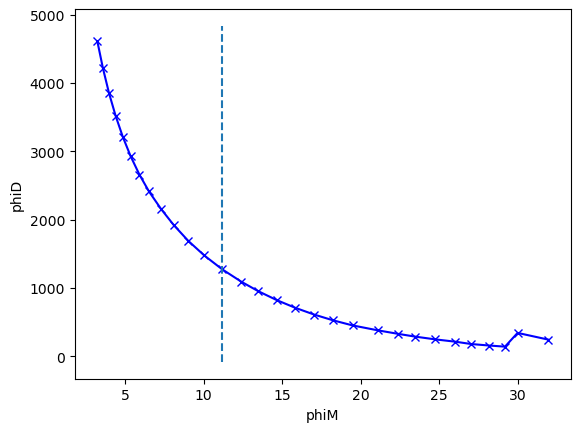

In [77]:
lambdas = np.logspace(np.log10(1000), np.log10(10), num=30)
phiD = []
phiM = []

for lam in lambdas:
    mgr.invert(data, zWeight=0.5, lam=lam, verbose=True)
    phiD.append(mgr.inv.phiData())
    phiM.append(mgr.inv.phiModel())

phiD = np.array(phiD)
phiM = np.array(phiM)

from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(phiM, phiD, S=1.0, curve="convex", direction="decreasing",interp_method='interp1d')

print(round(kneedle.elbow, 3))
print(round(kneedle.knee_y, 3))
print(lambdas[np.where(phiM==kneedle.knee)[0]])

plt.xlabel('phiM')
plt.ylabel('phiD')
plt.plot(phiM, phiD, 'bx-')
plt.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

13.489
954.487
[108.26367339]


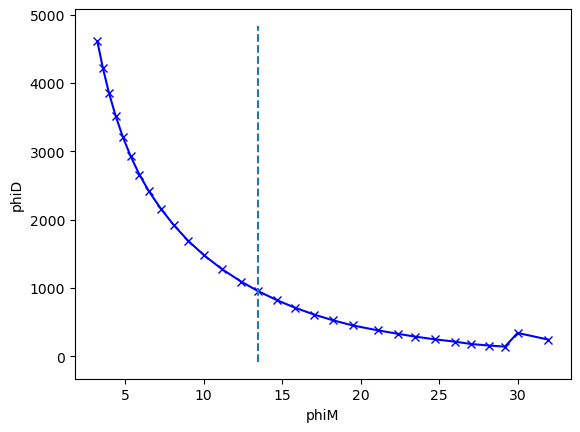

In [78]:
from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(phiM, phiD, online=True, curve="convex", direction="decreasing",interp_method='polynomial', polynomial_degree=3)

print(round(kneedle.elbow, 3))
print(round(kneedle.elbow_y, 3))
print(lambdas[np.where(phiM==kneedle.elbow)[0]])

plt.xlabel('phiM')
plt.ylabel('phiD')
plt.plot(phiM, phiD, 'bx-')
plt.vlines(kneedle.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

30/07/25 - 14:58:00 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2025_winter/all_inversions/kamik_diag1_winter\ERTManager


Path //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2025_winter/all_inversions/kamik_diag1_winter\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2025_winter/all_inversions/kamik_diag1_winter\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

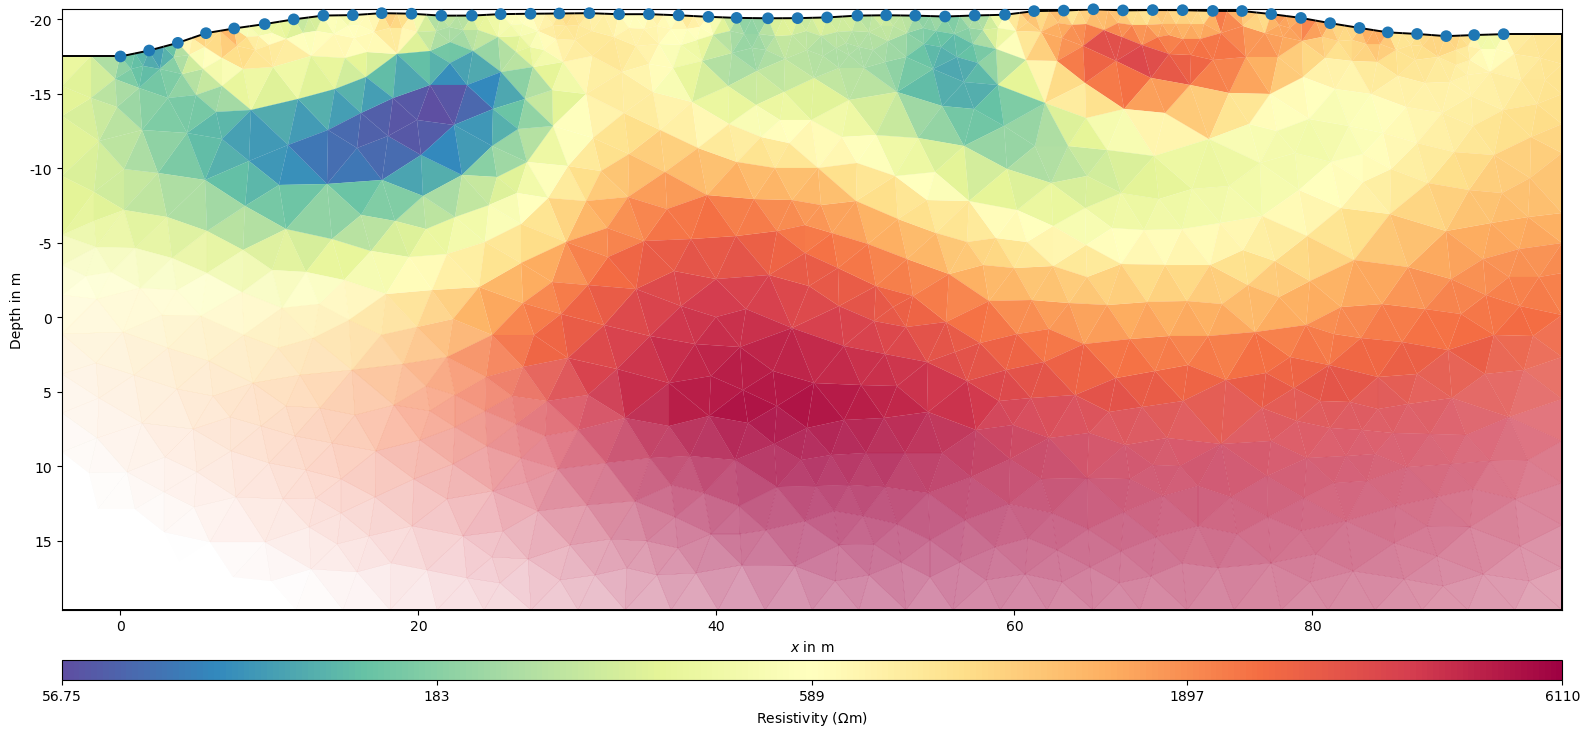

In [91]:
mgr.saveResult(dir+ 'all_inversions/kamik_diag1_winter')

In [90]:
mesh_kamik2024winter = pg.load(dir+'all_inversions/kamik_diag1_winter/ERTManager/resistivity-pd.bms')
res_kamik2024winter = pg.load(dir+'all_inversions/kamik_diag1_winter/ERTManager/resistivity.vector')
cov_kamik2024winter = pg.load(dir+'all_inversions/kamik_diag1_winter/ERTManager/resistivity-cov.vector')



C:\Users\Expedition\AppData\Local\Temp\ipykernel_52648\2444055434.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\Expedition\AppData\Local\Temp\ipykernel_52648\2444055434.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])


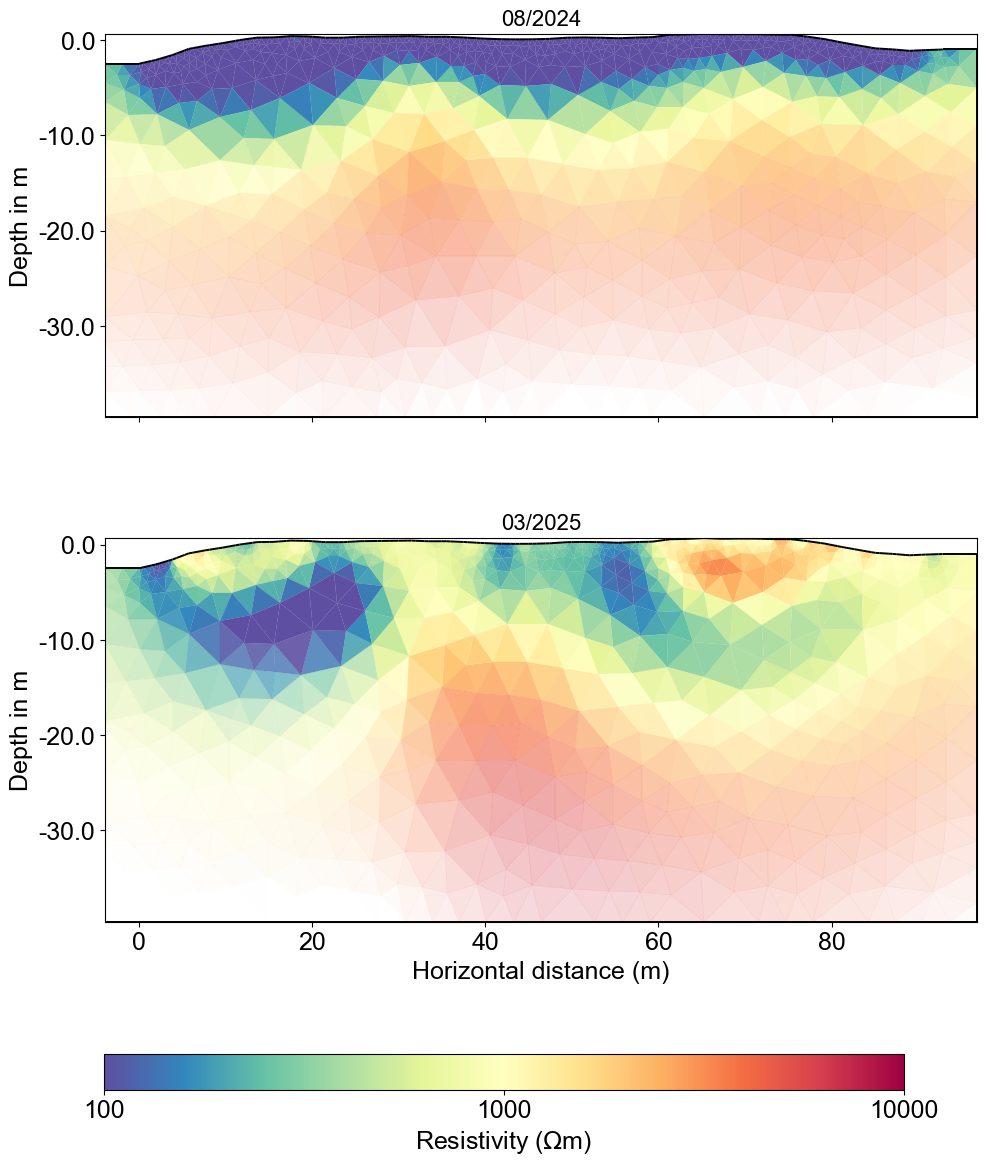

In [62]:
from matplotlib.ticker import LogLocator, LogFormatter

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18
plt.style.use('seaborn-v0_8-colorblind')
cMin=100
cMax=10000
fig, ax = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

pg.show(mesh_kamik2024summer, res_kamik2024summer, logScale=True, cMap= 'Spectral_r',ax=ax[0], cMin=cMin, cMax=cMax, colorBar=False, coverage=cov_kamik2024summer)
pg.show(mesh_kamik2024winter, res_kamik2024winter, logScale=True, cMap= 'Spectral_r',ax=ax[1], colorBar=False, cMin=cMin, cMax=cMax, coverage=cov_kamik2024winter, sharex=True)

#plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, wspace=0.5) 


cax = fig.add_axes([0.1, -0.01, 0.8, 0.03])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=cMin, cMax=cMax, logScale=True,cMap= 'Spectral_r')

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Resistivity ($\Omega$m)')

ax[0].set_title('08/2024', fontsize=16)
ax[1].set_title('03/2025', fontsize=16)


ax[0].set_aspect(1.1)
ax[1].set_aspect(1.1)


current_ticks = ax[0].get_yticks()
relative_ticks = current_ticks-20

ax[0].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
ax[1].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
ax[0].set_xlabel("")
ax[1].set_xlabel("Horizontal distance (m)")

plt.show()

